<a href="https://colab.research.google.com/github/karunyat/Oversampling-Techniques/blob/main/CM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### NASA Imbalanced Dataset - CM1

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.model_selection import GridSearchCV 
import matplotlib.pyplot as plt
df=pd.read_csv('/content/drive/My Drive/CM1.csv')

In [3]:
import numpy as np
df.head(3)

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,class
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.3,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.0,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.5,32.54,2936.77,...,1,0,6,0,15.0,15.0,44.0,19.0,9.0,False


In [4]:
X = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 4)

Building the model : Gaussian Naive Bayes Classifier

In [5]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()


Building the model : Decision Tree Classifier

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV 
model_dt = DecisionTreeClassifier()
param_dict_dt={
    "criterion":['gini','entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)
}
grid_search_dt=GridSearchCV(model_dt,param_grid=param_dict_dt,cv=10,verbose=1,n_jobs=-1,scoring = 'accuracy')
dt=grid_search_dt.fit(X_train,y_train)

grid_search_dt.best_params_

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
720 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a flo

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 4}

Building the model : Random Forest Classifier

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 
model_rf = RandomForestClassifier()  

param_dict_rf = {
    'bootstrap': [True],
    'max_depth': [80, 90],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 200]
}

grid_search_rf = GridSearchCV(estimator = model_rf, param_grid = param_dict_rf, 
                          cv = 3, n_jobs = -1,scoring = 'accuracy')
grid_search_rf.fit(X_train,y_train)
grid_search_rf.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

Building the model : Adaboost Classifier

In [8]:
from sklearn.ensemble import AdaBoostClassifier


model_Ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1,min_samples_leaf= 2,
 min_samples_split= 4))

params_dict_ada = {'n_estimators': [100,200,300]}
grid_search_ada = GridSearchCV(estimator = model_Ada, param_grid = params_dict_ada, 
 cv = 10, n_jobs = -1,scoring = 'accuracy') 

grid_search_ada.fit(X_train, y_train)  

grid_search_ada.best_params_

{'n_estimators': 100}

Building the model : Bagging Classifier

In [9]:
from sklearn.ensemble import BaggingClassifier

model_Bg = BaggingClassifier()


param_dict_bg = {
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

grid_search_bg = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(),
                                     n_estimators = 100, max_features = 0.5),
                   param_grid=param_dict_bg, scoring = 'accuracy',cv=10, n_jobs = -1, verbose = 1)
grid_search_bg.fit(X_train, y_train)
grid_search_bg.best_params_

Fitting 10 folds for each of 20 candidates, totalling 200 fits


{'base_estimator__max_depth': 1, 'max_samples': 0.5}

In [10]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [11]:
names = ["Naive_Bayes","J48","Random_Forest","Adaboost","Bagging"]
classifiers=[
             GaussianNB(),
                DecisionTreeClassifier(criterion= 'gini',max_depth= 2,min_samples_leaf= 2,min_samples_split= 2),
           
             RandomForestClassifier(bootstrap= True,max_depth= 80,max_features= 2,min_samples_leaf=3,min_samples_split= 10,n_estimators= 100),
            AdaBoostClassifier(DecisionTreeClassifier(max_depth=1,min_samples_leaf= 2,min_samples_split= 4),n_estimators=100),
              BaggingClassifier(DecisionTreeClassifier(max_depth= 1),n_estimators = 100, max_features = 0.5,max_samples= 0.05)
             ]

In [12]:
from sklearn.model_selection import cross_val_score
scores_no_sampling = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    cross_val_score(estimator=clf,X=X_train,y=y_train,cv=10)
    score = clf.score(X_test, y_test)
    scores_no_sampling.append(score.mean())

In [13]:
scores_no_sampling

[0.88, 0.9, 0.9, 0.9, 0.91]

In [14]:
import pandas as pd
import seaborn as sns

In [15]:
result_no_sampling = pd.DataFrame()
result_no_sampling['name'] = names
result_no_sampling['score'] = scores_no_sampling
result_no_sampling

,name,score
0,Naive_Bayes,0.88
1,J48,0.90
2,Random_Forest,0.90
3,Adaboost,0.90
4,Bagging,0.91


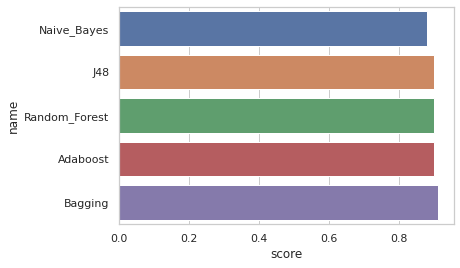

In [16]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=result_no_sampling)

In [21]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=5)
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'),y_train)

In [22]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({False: 359, True: 39})
After SMOTE : Counter({False: 359, True: 359})


In [23]:
scores_smote = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train_smote, y_train_smote)
    
    cross_val_score(estimator=clf,X=X_train_smote,y=y_train_smote,cv=10)
    score = clf.score(X_test, y_test)
    scores_smote.append(score)

In [24]:
scores_smote

[0.81, 0.77, 0.86, 0.83, 0.75]

In [25]:
result_smote = pd.DataFrame()
result_smote['name'] = names
result_smote['score'] = scores_smote
result_smote

,name,score
0,Naive_Bayes,0.81
1,J48,0.77
2,Random_Forest,0.86
3,Adaboost,0.83
4,Bagging,0.75


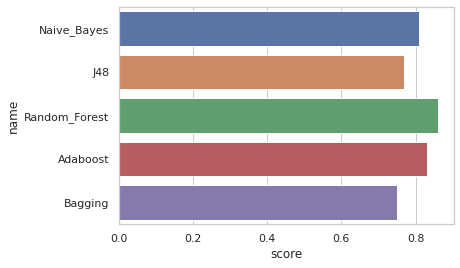

In [26]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=result_smote)

In [20]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(sampling_strategy='minority',random_state=420,n_neighbors=5)
X_train_ada, y_train_ada = ada.fit_resample(X_train.astype('float'),y_train)

In [27]:
from collections import Counter
print("Before ADASYN :" , Counter(y_train))
print("After ADASYN :" , Counter(y_train_ada))

Before ADASYN : Counter({False: 359, True: 39})
After ADASYN : Counter({True: 373, False: 359})


In [28]:
scores_Adasyn = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train_ada, y_train_ada)
    
    cross_val_score(estimator=clf,X=X_train_ada,y=y_train_ada,cv=10)
    score = clf.score(X_test, y_test)
    scores_Adasyn.append(score)

In [29]:
scores_Adasyn

[0.83, 0.63, 0.83, 0.83, 0.66]

In [30]:
result_Adasyn = pd.DataFrame()
result_Adasyn['name'] = names
result_Adasyn['score'] = scores_Adasyn
result_Adasyn

,name,score
0,Naive_Bayes,0.83
1,J48,0.63
2,Random_Forest,0.83
3,Adaboost,0.83
4,Bagging,0.66


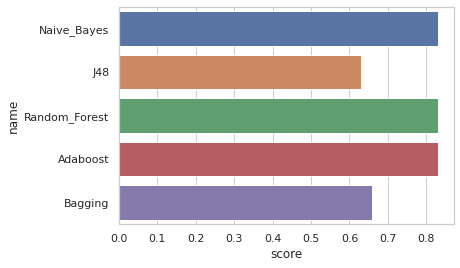

In [31]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=result_Adasyn)

In [33]:
from imblearn.over_sampling import BorderlineSMOTE
slsm = BorderlineSMOTE(sampling_strategy='minority',random_state=420)
X_train_slsm, y_train_slsm = slsm.fit_resample(X_train.astype('float'),y_train)


In [34]:
from collections import Counter
print("Before SLSM :" , Counter(y_train))
print("After SLSM :" , Counter(y_train_slsm))

Before SLSM : Counter({False: 359, True: 39})
After SLSM : Counter({False: 359, True: 359})


In [35]:
scores_slsm = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train_slsm, y_train_slsm)
    
    cross_val_score(estimator=clf,X=X_train_slsm,y=y_train_slsm,cv=10)
    score = clf.score(X_test, y_test)
    scores_slsm.append(score)

In [36]:
scores_slsm

[0.85, 0.79, 0.85, 0.9, 0.74]

In [37]:
result_slsm = pd.DataFrame()
result_slsm['name'] = names
result_slsm['score'] = scores_slsm
result_slsm

,name,score
0,Naive_Bayes,0.85
1,J48,0.79
2,Random_Forest,0.85
3,Adaboost,0.90
4,Bagging,0.74


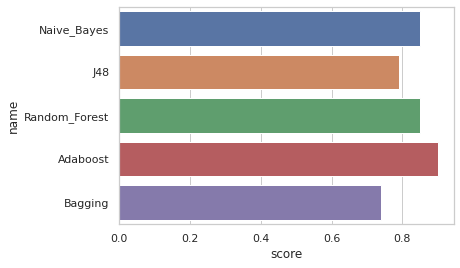

In [38]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=result_slsm)

In [39]:

from imblearn.over_sampling import RandomOverSampler

In [41]:
rdos = RandomOverSampler(sampling_strategy='minority')
X_train_rdos, y_train_rdos = rdos.fit_resample(X_train.astype('float'),y_train)

In [42]:
from collections import Counter
print("Before rdos :" , Counter(y_train))
print("After rdos :" , Counter(y_train_rdos))

Before rdos : Counter({False: 359, True: 39})
After rdos : Counter({False: 359, True: 359})


In [43]:
from sklearn.model_selection import cross_val_score
scores_rdos = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train_rdos, y_train_rdos)
    
    cross_val_score(estimator=clf,X=X_train_rdos,y=y_train_rdos,cv=10)
    score = clf.score(X_test, y_test)
    scores_rdos.append(score)

In [44]:
scores_rdos

[0.86, 0.7, 0.87, 0.86, 0.72]

In [45]:
result_rdos = pd.DataFrame()
result_rdos['name'] = names
result_rdos['score'] = scores_rdos
result_rdos

,name,score
0,Naive_Bayes,0.86
1,J48,0.70
2,Random_Forest,0.87
3,Adaboost,0.86
4,Bagging,0.72


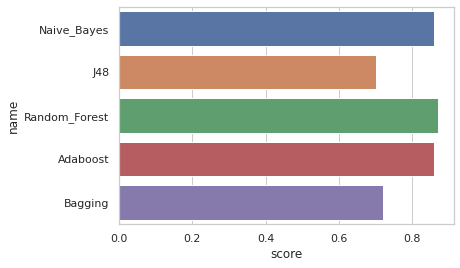

In [46]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=result_rdos)

In [47]:
 from imblearn.over_sampling import SVMSMOTE
 svm_smote = SVMSMOTE( sampling_strategy='auto', random_state=None, k_neighbors=5, n_jobs=None, m_neighbors=10, svm_estimator=None, out_step=0.5)
X_train_svm_smote, y_train_svm_smote = svm_smote.fit_resample(X_train.astype('float'),y_train)


In [48]:
from collections import Counter
print("Before svm_smote :" , Counter(y_train))
print("After svm_smote :" , Counter(y_train_svm_smote))

Before svm_smote : Counter({False: 359, True: 39})
After svm_smote : Counter({False: 359, True: 202})


In [49]:
from sklearn.model_selection import cross_val_score
scores_svm_smote = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train_svm_smote, y_train_svm_smote)
    
    cross_val_score(estimator=clf,X=X_train_svm_smote,y=y_train_svm_smote,cv=10)
    score = clf.score(X_test, y_test)
    scores_svm_smote.append(score)

In [50]:
scores_svm_smote

[0.85, 0.79, 0.89, 0.87, 0.8]

In [51]:
result_svm_smote = pd.DataFrame()
result_svm_smote['name'] = names
result_svm_smote['score'] = scores_svm_smote
result_svm_smote

,name,score
0,Naive_Bayes,0.85
1,J48,0.79
2,Random_Forest,0.89
3,Adaboost,0.87
4,Bagging,0.80


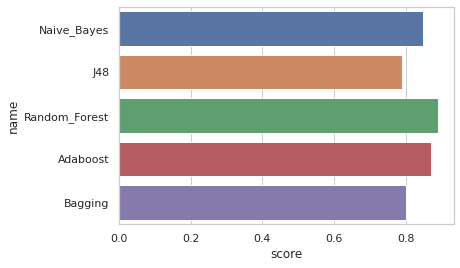

In [52]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=result_svm_smote)